## Sorting Data

Now we're going to build on notebook (1), the Colour Palette, by using it to produce a more interactive 3D visualisation with Plotly. 

To do this, we're first going to download a large number of images into the ImageData folder. 

In [183]:
import csv
from matplotlib import pyplot as plt
%matplotlib inline
import skimage
from skimage import io, transform, color
import numpy as np

In [184]:
WGACatalog = []
with open('../ImageData/WGA/WebGalleryCatalog.csv', 'rt', encoding = "ISO-8859-1") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';', quotechar="'")
    for row in spamreader:
        WGACatalog.append(row)
print('Downloaded catalogue of ' + str(len(WGACatalog)-1) + ' elements. ')

Downloaded catalogue of 45461 elements. 


In [185]:
# Each entry in the catalog contains a URL pointing to the entry on the Web Gallery of Art's (old) webpage, 
# something like: https://www.wga.hu/html/a/aachen/allegory.html 
# We want to change it to something like: https://www.wga.hu/art/a/aachen/allegory.jpg 
# using some predictable text replacements, which is very easy to do in Python:

ImURLs = []
for WGAC in WGACatalog[1:]:
    ImURLs.append(WGAC[6].replace('/html/','/art/').replace('.html','.jpg'))

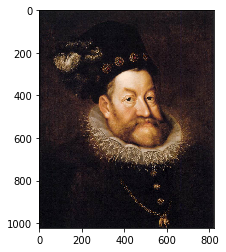

In [186]:
# Now we check that our catalog is sensible

plt.imshow(io.imread(ImURLs[3]))

In [187]:
import tqdm

In [188]:
# Now we've downloaded all the images, let's load them all into memory: 
NPaintings = 500
AllIms = np.zeros((NPaintings,256,256,3))
for i in tqdm.tqdm(range(NPaintings)):
    AllIms[i,:,:,:] = transform.resize(io.imread('../ImageData/WGA/Images' + str(i).zfill(5) + '.jpg'),(256,256,3))





  0%|          | 0/500 [00:00<?, ?it/s]/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning:

The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.

/home/impett/anaconda3/envs/esu2018/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning:

Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.





  1%|          | 3/500 [00:00<00:19, 26.12it/s]



  1%|          | 6/500 [00:00<00:18, 26.45it/s]



  2%|▏         | 10/500 [00:00<00:16, 29.75it/s]



  3%|▎         | 13/500 [00:00<00:17, 28.26it/s]



  3%|▎         | 16/500 [00:00<00:17, 28.02it/s]



  4%|▍         | 20/500 [00:00<00:16, 28.85it/s]



  5%|▍         | 24/500 [00:00<00:15, 30.00it/s]



  5%|▌         | 27/500 [00:00<00:16, 29.53it/s]



  6%|▌         | 30/500 [00:01<00:17, 27.14it/s]



  7%|▋         | 33/500 [00:01<00:17, 26.93it/s]



  7%|▋         | 36/500

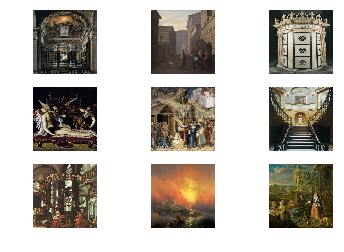

In [189]:
## Let's open a few of these images, to check they're the right sort of thing! 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(AllIms[np.random.randint(NPaintings),:,:,:])
    plt.axis('off')

In [190]:
from sklearn import cluster

In [191]:
def colourPalette(TestIm, nClust=3):
    LABim = color.rgb2lab(TestIm)
    ABim = LABim[:,:,1:]
    CX = cluster.KMeans(n_clusters=nClust, max_iter=25)
    iM = TestIm.shape[0]
    jM = TestIm.shape[1]
    Clusts = CX.fit_predict(ABim.reshape(iM*jM,2))
    palette = []
    for i in range(nClust):
        p = np.mean(LABim.reshape(iM*jM,3)[Clusts==i],axis=0)
        palette.append( color.lab2rgb(p.reshape(1,1,3))[0][0] )
    return palette

In [321]:
def showPalette(palette, show=True):
    nCols = len(palette)
    pIms = []
    for i in range(nCols):
        p = palette[i]
        pIm = np.tile(p,(10,10,1))
        pIms.append(pIm)
        if show:
            plt.subplot(1,nCols,i+1)
            plt.imshow(pIm)
            plt.axis('off')
    return pIms

Now let's see if it works on some other images, for some other number of clusters... 

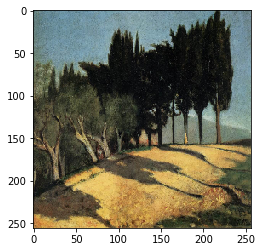

In [193]:
plt.imshow(AllIms[19,:,:,:])

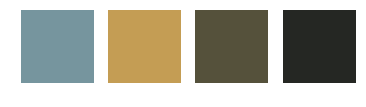

In [194]:
showPalette(colourPalette(AllIms[19,:,:,:],nClust=4))

Finally, let's try and look at our whole dataset, seeing how colours change for different images... 

In [195]:
allPalettes = []
for i in tqdm.tqdm(range(NPaintings)):
    allPalettes.append(colourPalette(AllIms[i,:,:,:],nClust=2 ))
    





  0%|          | 0/500 [00:00<?, ?it/s]



  0%|          | 1/500 [00:00<01:47,  4.65it/s]



  0%|          | 2/500 [00:00<01:45,  4.72it/s]



  1%|          | 3/500 [00:00<01:40,  4.97it/s]



  1%|          | 4/500 [00:00<01:38,  5.03it/s]



  1%|          | 5/500 [00:00<01:33,  5.27it/s]



  1%|          | 6/500 [00:01<01:39,  4.97it/s]



  1%|▏         | 7/500 [00:01<01:43,  4.76it/s]



  2%|▏         | 8/500 [00:01<01:47,  4.58it/s]



  2%|▏         | 9/500 [00:01<01:44,  4.70it/s]



  2%|▏         | 10/500 [00:02<01:49,  4.47it/s]



  2%|▏         | 11/500 [00:02<01:53,  4.32it/s]



  2%|▏         | 12/500 [00:02<01:54,  4.27it/s]



  3%|▎         | 13/500 [00:03<01:55,  4.20it/s]



  3%|▎         | 14/500 [00:03<01:54,  4.26it/s]



  3%|▎         | 15/500 [00:03<01:54,  4.25it/s]



  3%|▎         | 16/500 [00:03<01:53,  4.28it/s]



  3%|▎         | 17/500 [00:03<01:52,  4.29it/s]



  4%|▎         | 18/500 [00:04<01:51,  4.31it/s]



  4%|▍         | 19/500 [0

 51%|█████     | 253/500 [01:15<01:13,  3.35it/s]



 51%|█████     | 254/500 [01:15<01:13,  3.35it/s]



 51%|█████     | 255/500 [01:15<01:13,  3.36it/s]



 51%|█████     | 256/500 [01:16<01:12,  3.36it/s]



 51%|█████▏    | 257/500 [01:16<01:12,  3.36it/s]



 52%|█████▏    | 258/500 [01:16<01:11,  3.36it/s]



 52%|█████▏    | 259/500 [01:17<01:11,  3.36it/s]



 52%|█████▏    | 260/500 [01:17<01:11,  3.36it/s]



 52%|█████▏    | 261/500 [01:17<01:11,  3.36it/s]



 52%|█████▏    | 262/500 [01:17<01:10,  3.36it/s]



 53%|█████▎    | 263/500 [01:18<01:10,  3.36it/s]



 53%|█████▎    | 264/500 [01:18<01:10,  3.36it/s]



 53%|█████▎    | 265/500 [01:18<01:09,  3.37it/s]



 53%|█████▎    | 266/500 [01:18<01:09,  3.37it/s]



 53%|█████▎    | 267/500 [01:19<01:09,  3.38it/s]



 54%|█████▎    | 268/500 [01:19<01:08,  3.38it/s]



 54%|█████▍    | 269/500 [01:19<01:08,  3.37it/s]



 54%|█████▍    | 270/500 [01:20<01:08,  3.37it/s]



 54%|█████▍    | 271/500 [01:20<01:07,  3.37it

In [196]:
# Test a suitable output:
i = 5
j = i + 1
allPalettes[i][0].tolist() +  allPalettes[i][1].tolist() + [WGACatalog[j][7]]  + [WGACatalog[j][8]]  + [WGACatalog[j][9]]  + [WGACatalog[j][10]]  + [WGACatalog[j][2]] 

[0.32880437731824697,
 0.29313050835874976,
 0.24376980684279653,
 0.4744824751542083,
 0.4320447656233151,
 0.2550802100489841,
 'painting',
 'landscape',
 'Danish',
 '1851-1900',
 'Deer beside a Lake']

In [197]:
WGACatalog[0]

['AUTHOR',
 'BORN-DIED',
 'TITLE',
 'DATE',
 'TECHNIQUE',
 'LOCATION',
 'URL',
 'FORM',
 'TYPE',
 'SCHOOL',
 'TIMEFRAME']

In [198]:

with open('colors.csv', 'wt') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['R1', 'G1', 'B1', 'R2', 'G2', 'B2', 'media', 'theme', 'school', 'timeframe', 'title'])
    for i in range(NPaintings):
        j = i + 1 #index 0 in the WGACatalog are the titles
        spamwriter.writerow(
            allPalettes[i][0].tolist() +  allPalettes[i][1].tolist() + [WGACatalog[j][7]]  + [WGACatalog[j][8]]  + [WGACatalog[j][9]]  + [WGACatalog[j][10]] + [WGACatalog[j][2]]  )

In [199]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools

plotly.tools.set_credentials_file(username='leoimpett', api_key='ZW2d2yytqwbgeCgyYwq7')

In [200]:
r0 = [allPalettes[i][0][0] for i in range(len(allPalettes))]
g0 = [allPalettes[i][0][1] for i in range(len(allPalettes))]
b0 = [allPalettes[i][0][2] for i in range(len(allPalettes))]
names = [WGACatalog[i+1][8] for i in range(len(allPalettes))]
col0 = np.stack((np.asarray(r0), np.asarray(g0), np.asarray(b0)))*255

In [201]:
# Create traces
from itertools import compress
trace = []
for xname in np.unique(names):
    idx = [x==xname for x in names]
    trace.append(
        go.Scatter3d(
        x = list(compress(r0,idx)),
        y = list(compress(g0,idx)),
        z = list(compress(b0,idx)),
        name = xname,
        mode = 'markers',
        marker=dict(
            size=16,
#            color = r0
        )
    ))


    


py.iplot(trace,  filename = 'WGA-colours')

In [202]:
# Create traces
from itertools import compress
trace = []
for i in range(len(r0)):
    trace.append(
        go.Scatter3d(
        x = r0[i],
        y = g0[i],
        z = b0[i],
#        name = xname,
        mode = 'markers',
        marker=dict(
            size=16,
            color = 'rgb( ' + str(r0[i])  +',' + str(g0[i]) + ',' + str(b0[i]) + ')'
        )
    ))


    
layout = go.Layout(showlegend=False)

fig = go.Figure(data=trace, layout=layout)

py.iplot(fig,  filename = 'WGA-colours')

# Interactive Colour Picker
Now we're going to make a small interactive tool to retrieve an image based on its colour palette. 

To do this, we'll need the interactive library ipywidgets:


`conda install ipywidgets`

In [441]:
from io import BytesIO
from scipy import spatial
import ipywidgets as widgets
import PIL

Now we're going to write a few IPython widgets for colour-picking, and write a function (`on_new_color`) which will be called every time we pick a new colour:

In [ ]:
IPython.display.display(PIL.Image.fromarray((255.0*AllIms[3,:,:,:]).astype(np.uint8)))

In [456]:
def floatim2bytes(floatim):
    
    pilIm = PIL.Image.fromarray((255.0* floatim  ).astype(np.uint8))
    imgByteArr = BytesIO()
    pilIm.save(imgByteArr, format='PNG')
    imgByteArr = imgByteArr.getvalue()
    return imgByteArr

In [458]:
# First, two identical colour-pickers:

w1 = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='#ff0000',
    disabled=False
)
w2 = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='#0000ff',
    disabled=False
)




# This is a 'KD Tree', a very fast lookup system for finding the nearest pair of colours

A = np.asarray(allPalettes).reshape(NPaintings,6)
tree = spatial.KDTree(A)

# Now a function, to be called when we pick a new colour, which will print out the nearest image in our dataset 
# (and the two colours in the palette)

def on_new_color(change):
    if change['name']=='value':
        h = w1.value.lstrip('#')
        c1 = [int(h[i:i+2], 16) for i in (0, 2 ,4)]
        h = w2.value.lstrip('#')
        c2 = [int(h[i:i+2], 16) for i in (0, 2 ,4)]


        Q = np.asarray((c1+c2)).astype(np.float32) * (1/255.0)
        QT = np.asarray((c2+c1)).astype(np.float32) * (1/255.0)




        [d1,ii1] = tree.query(Q)
        [d2,ii2] = tree.query(QT)
        ii = ii1
        if d2 < d1:
            ii = ii2


#         plt.imshow(AllIms[ii,:,:,:])

        plt.subplot(1,3,1)
        plt.imshow(AllIms[ii,:,:,:])
        [ia, ib] = showPalette(allPalettes[ii],show=False)
        plt.axis('off')
        plt.subplot(1,3,2)
        plt.imshow(ia)
        plt.axis('off')
        plt.subplot(1,3,3)
        plt.imshow(ib)
        plt.axis('off')

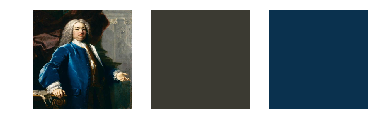

In [459]:
w1.observe(on_new_color)
w2.observe(on_new_color)

wb = widgets.HBox([w1,w2])

display(wb)


Now, we don't like the fact that a new image pops up every time we select another colour. We'd much prefer 

In [480]:

w3 = widgets.Image(
    value=floatim2bytes(AllIms[3,:,:,:]),
    width=256,
    height=256
    )

w4 = widgets.Image(
    value=floatim2bytes(showPalette(allPalettes[3],show=False)[0]),
    width=256,
    height=256
    )
w5 = widgets.Image(
    value=floatim2bytes(showPalette(allPalettes[3],show=False)[1]),
    width=256,
    height=256
    )

w1 = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='#ff0000',
    disabled=False
)
w2 = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='#0000ff',
    disabled=False
)

def on_new_color(change):
    if change['name']=='value':
        h = w1.value.lstrip('#')
        c1 = [int(h[i:i+2], 16) for i in (0, 2 ,4)]
        h = w2.value.lstrip('#')
        c2 = [int(h[i:i+2], 16) for i in (0, 2 ,4)]


        Q = np.asarray((c1+c2)).astype(np.float32) * (1/255.0)
        QT = np.asarray((c2+c1)).astype(np.float32) * (1/255.0)




        [d1,ii1] = tree.query(Q)
        [d2,ii2] = tree.query(QT)
        ii = ii1
        if d2 < d1:
            ii = ii2
        [ia, ib] = showPalette(allPalettes[ii],show=False)
        w3.value = floatim2bytes(AllIms[ii,:,:,:])
        w4.value = floatim2bytes(ia)
        w5.value = floatim2bytes(ib)

In [481]:
w1.observe(on_new_color)
w2.observe(on_new_color)

wcols = widgets.HBox([w1,w2])
wims = widgets.HBox([w3,w4,w5])
wc = widgets.VBox([wcols,wims])
display(wc)


282